In [1]:
import numpy as np
from scipy import optimize
from scipy.special import jve as jv, yve as yv
import matplotlib.pyplot as plt

$$
\left(\begin{array}{cccc}
\sqrt{\varepsilon_2} J_{\ell} & 0 & - \sqrt{\varepsilon_1}H_{\ell}^{(1)} & 0 \\
n_2 \frac{\ell \beta}{\kappa_1^2 r_0} J_{\ell} & \mathrm{i} \sqrt{\varepsilon_2} \frac{k_1}{\kappa_1} J_{\ell}^{\prime} & - \sqrt{\varepsilon_1}\frac{\ell \beta}{\kappa_2^2 r_0} H_{\ell}^{(1)} & -\mathrm{i}  \sqrt{\varepsilon_1}\frac{k_2}{\kappa_2} H_{\ell}^{(1)^{\prime}} \\
0 & J_{\ell} & 0 & -H_{\ell}^{(1)} \\
-\mathrm{i} \frac{k_1}{\kappa_1} J_{\ell}^{\prime} & \frac{\ell \beta}{\kappa_1^2 r_0} J_{\ell} & \mathrm{i} \frac{k_2}{\kappa_2} H_{\ell}^{(1)^{\prime}} & -\frac{\ell \beta}{\kappa_2^2 r_0} H_l^{(1)}
\end{array}\right)
$$
$$\kappa_i=\sqrt{k^2_i-\beta^2}$$

$$
\left(\begin{array}{cccc}
n_2 J_{1}(\kappa_1r_0) & 0 & - n_1H_{1}^{(1)} (\kappa_2r_0)& 0 \\
n_2 \frac{\beta}{\kappa_1^2 r_0} J_{1}(\kappa_1r_0) & \mathrm{i} n_2 \frac{k_1}{\kappa_1} J_{1}^{\prime}(\kappa_1r_0) & - n_1\frac{\beta}{\kappa_2^2 r_0} H_{1}^{(1)}(\kappa_2r_0) & -\mathrm{i}  n_1\frac{k_2}{\kappa_2} H_{1}^{(1)^{\prime}} (\kappa_2r_0)\\
0 & J_{1}(\kappa_1r_0) & 0 & -H_{1}^{(1)}(\kappa_2r_0) \\
-\mathrm{i} \frac{k_1}{\kappa_1} J_{1}^{\prime}(\kappa_1r_0) & \frac{\beta}{\kappa_1^2 r_0} J_{1}(\kappa_1r_0) & \mathrm{i} \frac{k_2}{\kappa_2} H_{1}^{(1)^{\prime}}(\kappa_2r_0) & -\frac{\beta}{\kappa_2^2 r_0} H_l^{(1)}(\kappa_2r_0)
\end{array}\right)
$$

In [2]:
def detA(kz,k0):
    n1=1.45
    n2=1
    k1=n1*k0
    k2=n2*k0
    κ1=np.emath.sqrt(k1**2-kz**2)
    κ2=np.emath.sqrt(k2**2-kz**2)
    with np.errstate(divide='ignore', invalid='ignore'):
        J=jv(1,κ1)
        Jp=jv(0,κ1)-jv(1,κ1)/κ1
        Yp=yv(0,κ1)-yv(1,κ1)/κ1
        H=(jv(1,κ2)+1j*yv(1,κ2))
        Hp=(Jp+1j*Yp)
        a11=n2*J
        a12=0
        a13=-n1*H
        a14=0
        a21=n2*(kz/(κ1)**2)*J
        a22=1j*n2*(k1/κ1)*Jp
        a23=-n1*(kz/(κ2)**2)*H
        a24=-1j*n1*(k2/κ2)*Hp
        a31=0
        a32=J
        a33=0
        a34=-H
        a41=-1j*(k1/κ1)*Jp
        a42=(kz/(κ1)**2)*J
        a43=1j*(k2/κ2)*Hp
        a44=-(kz/(κ2)**2)*H
    return np.abs(a14*a23*a32*a41 - a13*a24*a32*a41 - a14*a22*a33*a41 + 
        a12*a24*a33*a41 + a13*a22*a34*a41 - a12*a23*a34*a41 - 
        a14*a23*a31*a42 + a13*a24*a31*a42 + a14*a21*a33*a42 - 
        a11*a24*a33*a42 - a13*a21*a34*a42 + a11*a23*a34*a42 + 
        a14*a22*a31*a43 - a12*a24*a31*a43 - a14*a21*a32*a43 + 
        a11*a24*a32*a43 + a12*a21*a34*a43 - a11*a22*a34*a43 - 
        a13*a22*a31*a44 + a12*a23*a31*a44 + a13*a21*a32*a44 - 
        a11*a23*a32*a44 - a12*a21*a33*a44 + a11*a22*a33*a44)

In [9]:
N=2000
m=5e-1
n=5
x=np.linspace(m,n,N)
y=np.linspace(m,n,N)
X, Y = np.meshgrid(x, y)
Z=np.log10(detA(2*np.pi*X,2*np.pi*Y))

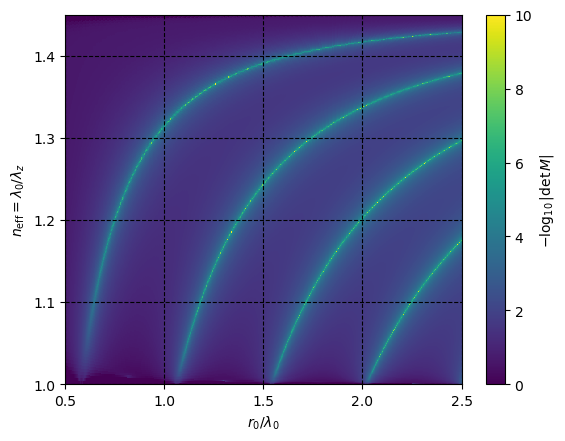

In [4]:
plt.pcolormesh(Y,X/Y,-Z)
plt.colorbar(label=r'$-\log_{10}|\det{M}|$')
plt.xticks(np.arange(0, n+.5, .5))
plt.yticks(np.arange(1, 1.45, .1))
# plt.minorticks_on()
plt.clim(vmax=10,vmin=0) 
plt.ylim(ymin=1,ymax=1.45)
plt.xlim(xmin=0.5,xmax=2.5)
plt.grid(color='black', linestyle='--')
plt.ylabel(r'$n_\mathrm{eff}=\lambda_0/\lambda_z$')
plt.xlabel(f'$r_0/\lambda_0$')
plt.show()

In [5]:
optimize.fmin(func=detA, x0=7,args=(6,))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 28


array([7.81074219])